In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import env
import wrangle
import explore
from acquire import get_telco_data
from prepare import prep_telco

In [2]:
df = get_telco_data()

Using cached data


In [3]:
df = prep_telco(df)

In [4]:
train, validate, test = wrangle.split_data(df)

Data split as follows: Train 56.00%, Validate 24.00%, Test 20.00%


In [5]:
numerics = ['tenure','monthly_charges','total_charges']

In [6]:
train[numerics]

tenure  monthly_charges  total_charges
5402       2            46.05          80.35
2877       5            85.30         424.15
660       61           106.20        6375.20
5842      60            79.00        4801.10
2230       9            75.85         647.50
...      ...              ...            ...
3201      35            75.20        2576.20
4247      48            73.85        3581.40
2518       3            80.40         224.05
6236      59            19.35        1099.60
6332       4            19.60          93.45

[3937 rows x 3 columns]

In [7]:
# for col in numerics:
#     for y in numerics:
#         # Don't need to see univariate distribution
#         if y == col:
#             continue
#         sns.lmplot(data = train[numerics], x=col, y=y, line_kws={'color': 'red'})

In [8]:
train.columns

Index(['customer_id', 'is_senior_citizen', 'tenure', 'multiple_lines',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'monthly_charges', 'total_charges',
       'churn', 'contract_type', 'internet_service_type', 'payment_type',
       'is_male', 'has_phone', 'has_internet_service', 'has_partner',
       'has_dependent', 'is_paperless', 'is_month_to_month', 'is_autopay',
       'has_streaming'],
      dtype='object')

In [9]:
categoricals = ['is_senior_citizen','contract_type', 'internet_service_type']

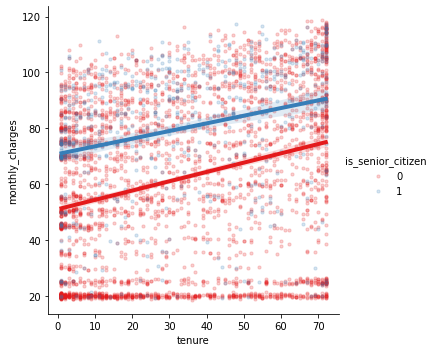

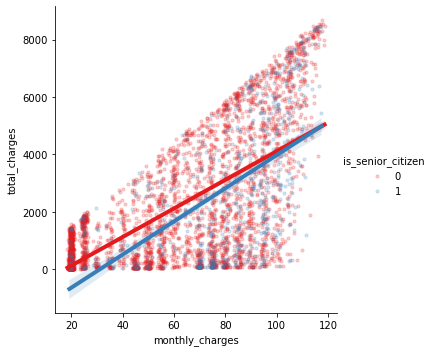

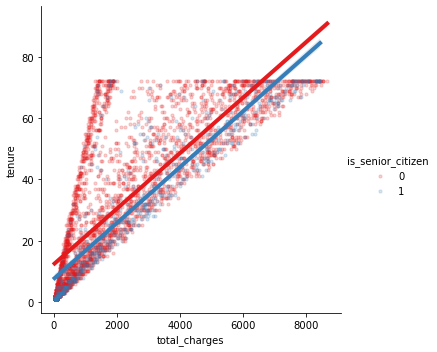

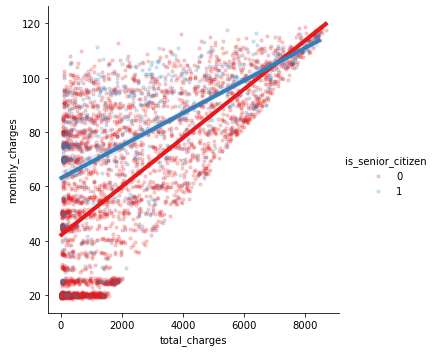

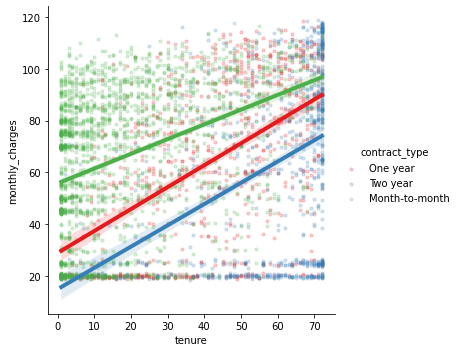

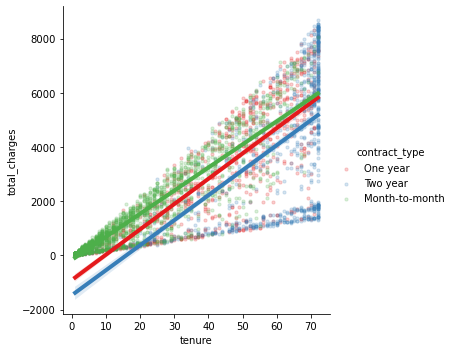

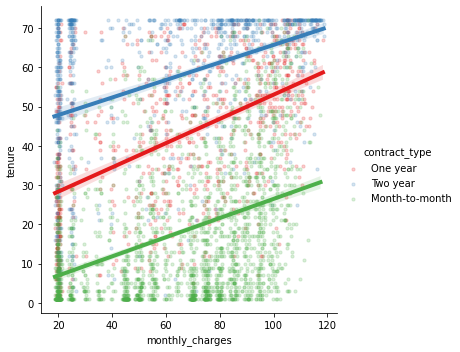

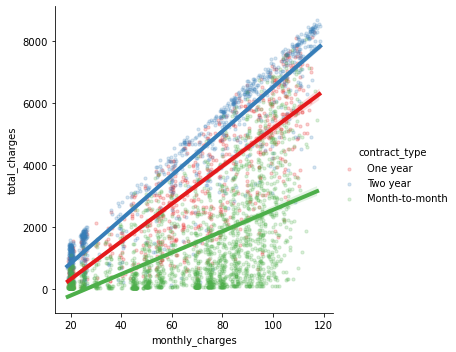

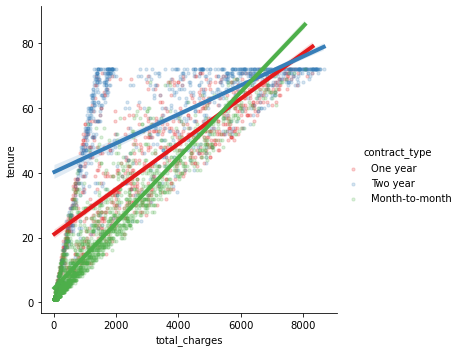

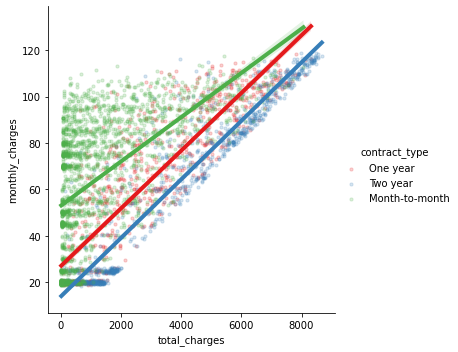

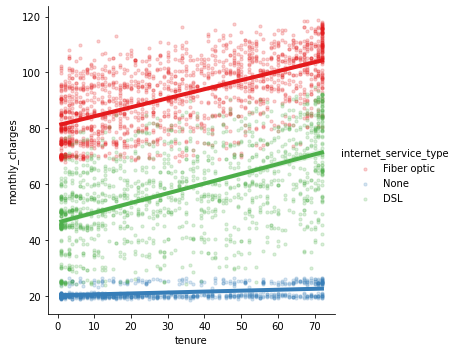

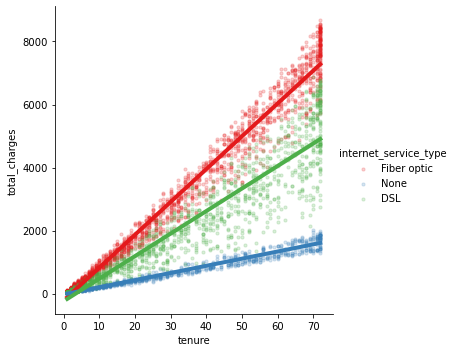

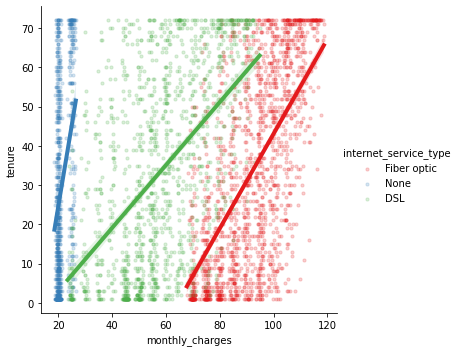

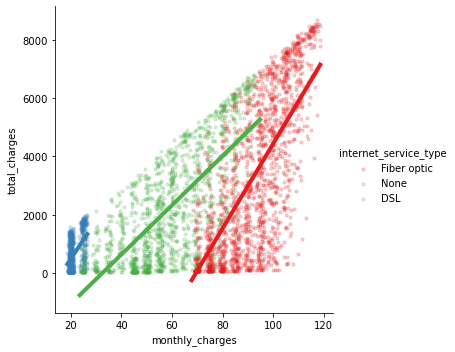

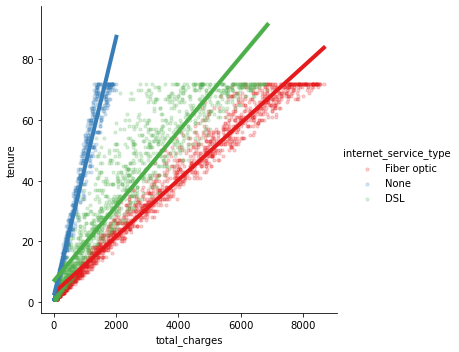

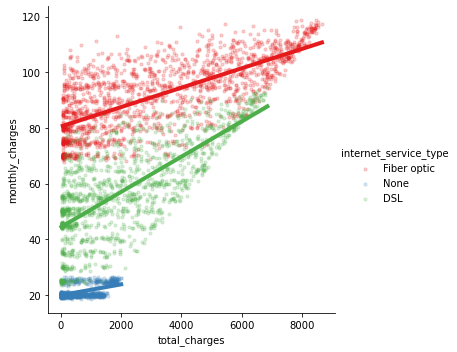

In [10]:
# using function from explore.py instead
explore.plot_variable_pairs(train, numerics, categoricals, len(train))

In [11]:
# use function to convert tenure to years
train = explore.months_to_years(train)

In [12]:
train.columns

Index(['customer_id', 'is_senior_citizen', 'tenure', 'multiple_lines',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'monthly_charges', 'total_charges',
       'churn', 'contract_type', 'internet_service_type', 'payment_type',
       'is_male', 'has_phone', 'has_internet_service', 'has_partner',
       'has_dependent', 'is_paperless', 'is_month_to_month', 'is_autopay',
       'has_streaming', 'tenure_years'],
      dtype='object')

In [13]:
cat_columns = ['is_senior_citizen','online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies',
       'online_security', 'churn', 'internet_service_type', 'payment_type',
       'is_male', 'has_phone', 'has_internet_service', 'has_partner',
       'has_dependent', 'is_paperless', 'is_month_to_month', 'is_autopay',
       'has_streaming']

Generating plots tenure by internet_service_type


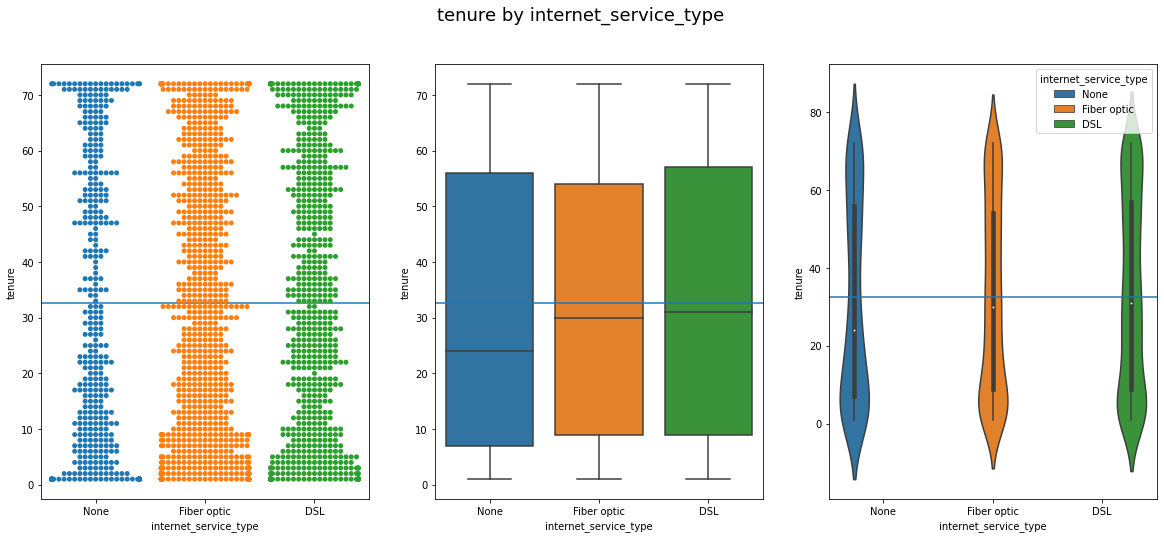

Generating plots tenure by payment_type


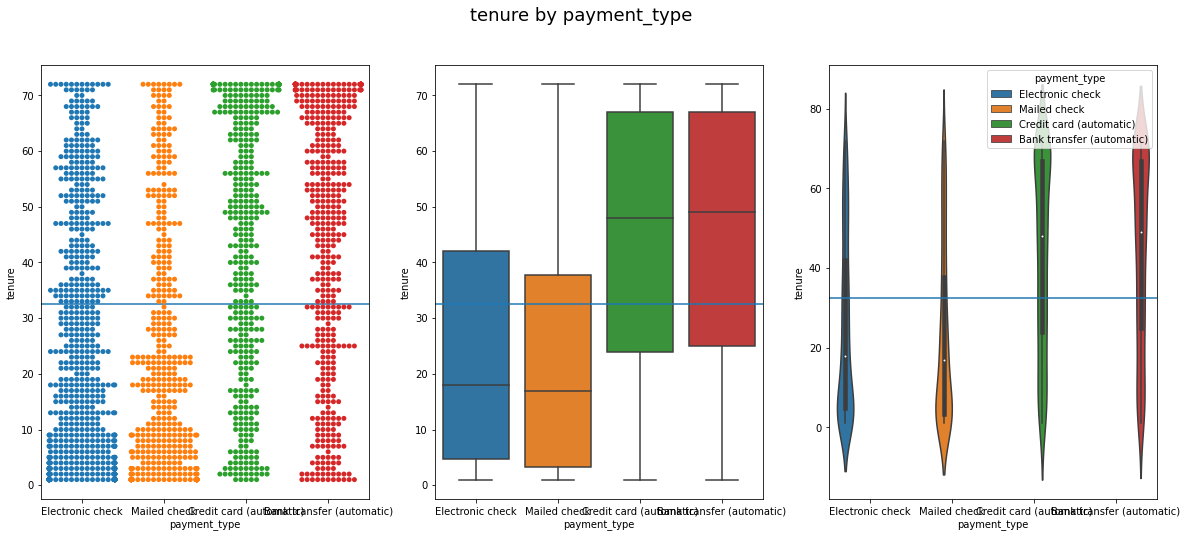

Generating plots monthly_charges by internet_service_type


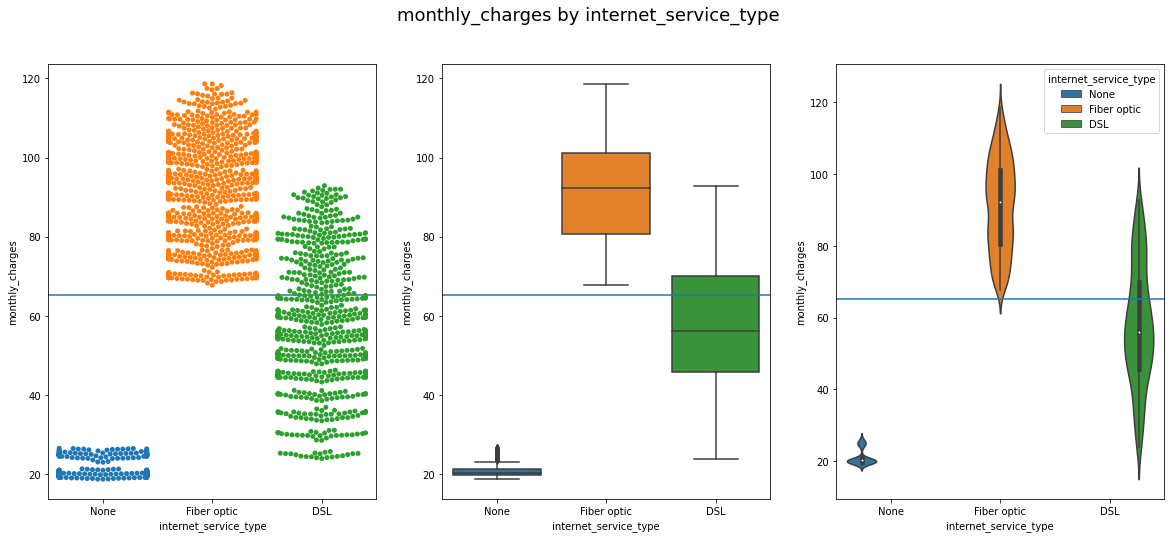

Generating plots monthly_charges by payment_type


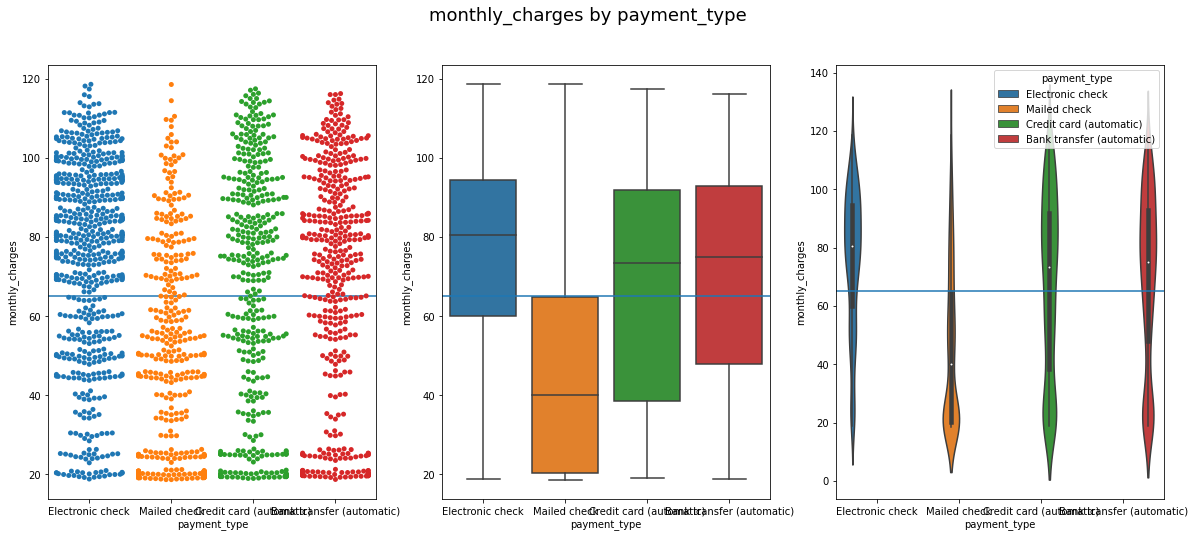

Generating plots total_charges by internet_service_type


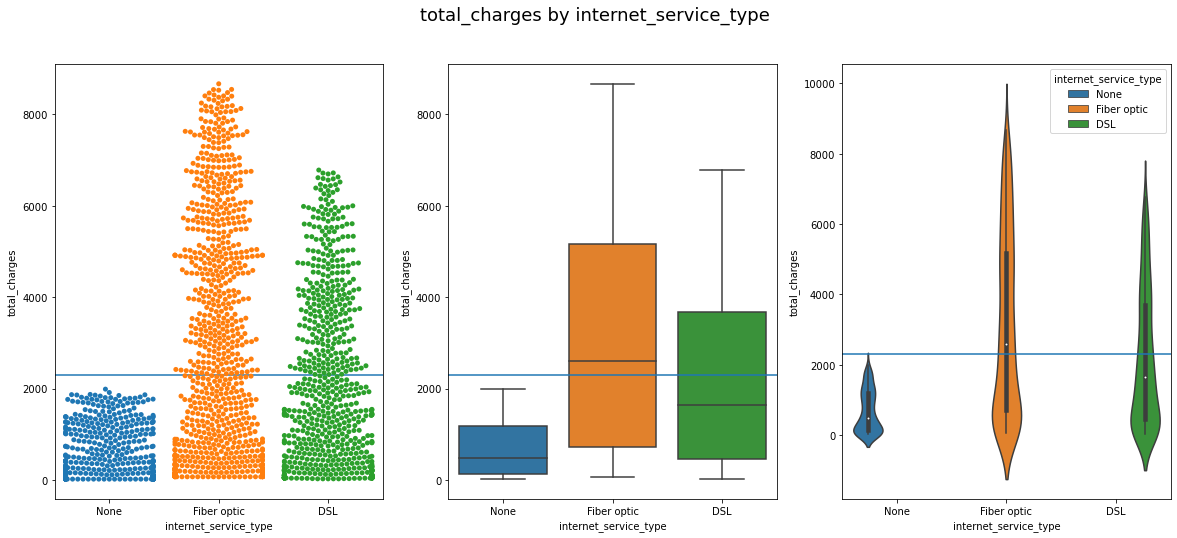

Generating plots total_charges by payment_type


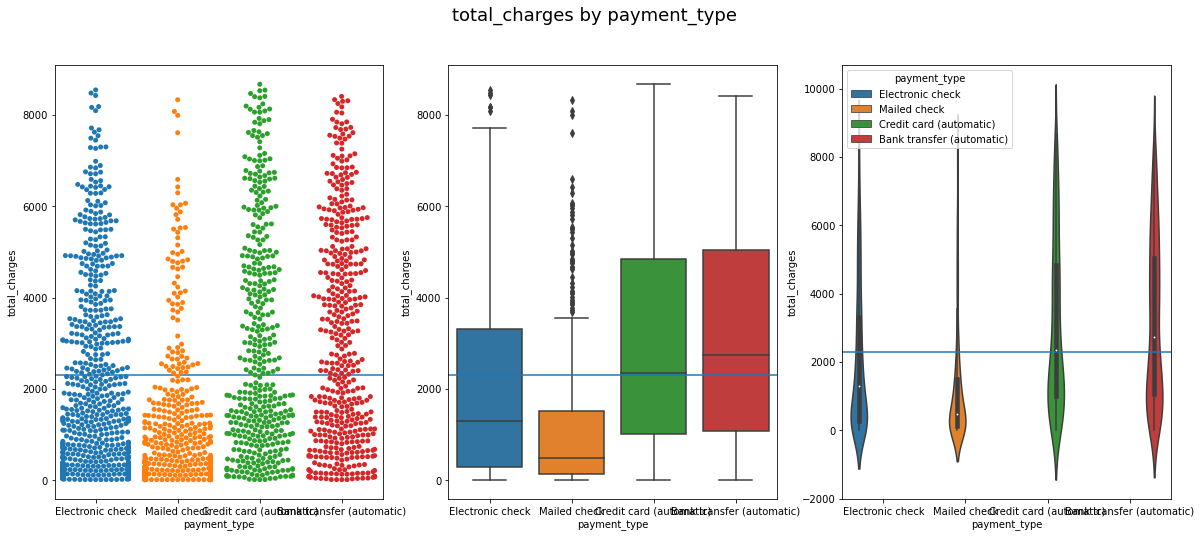

In [14]:
explore.plot_categorical_and_continuous_vars(train, cat_columns[8:10], numerics, sample_amt=2000)

## Mall Customers done in separate notebook (mall_customers)

# Zillow Explore

In [28]:
df = wrangle.wrangle_zillow()

Using cached data


In [29]:
df.columns

Index(['parcel_id', 'bedroom_cnt', 'bathroom_cnt', 'square_feet', 'tax_value',
       'year_built', 'tax_amount', 'fips'],
      dtype='object')

In [30]:
# Remove outliers
df = wrangle.remove_outliers(df, 1.5, ['bedroom_cnt', 'bathroom_cnt', 'square_feet', 'tax_value',
       'year_built', 'tax_amount'])

Number of observations removed: 255999


In [31]:
df = df.dropna()

In [32]:
df.shape

(1893902, 8)

In [33]:
train, validate, test = wrangle.split_data(df)

Data split as follows: Train 56.00%, Validate 24.00%, Test 20.00%


In [34]:
# Applies the MinMax scaler to each dataset
train, validate, test = wrangle.scale_data(train, validate, test, ['square_feet',
       'year_built', 'tax_amount'])

### Data now split and scaled - exploring with train going forward
 - Trying to predict tax_value

In [35]:
train.columns

Index(['parcel_id', 'bedroom_cnt', 'bathroom_cnt', 'square_feet', 'tax_value',
       'year_built', 'tax_amount', 'fips', 'square_feet_scaled',
       'year_built_scaled', 'tax_amount_scaled'],
      dtype='object')

In [36]:
categoricals = ['fips','bedroom_cnt',
       'bathroom_cnt',]
numerics = ['square_feet_scaled', 'tax_value',
       'year_built_scaled', 'tax_amount_scaled']

## Plotting numerics pairwise

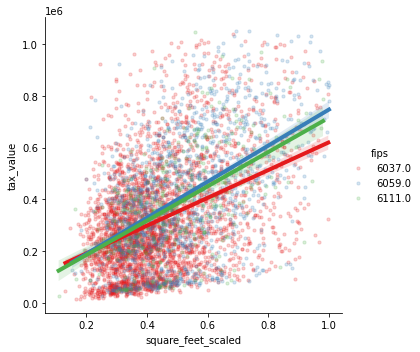

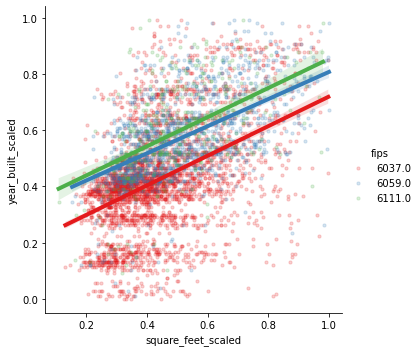

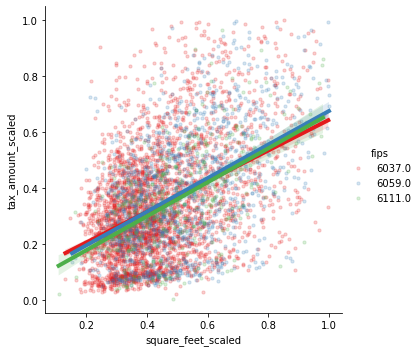

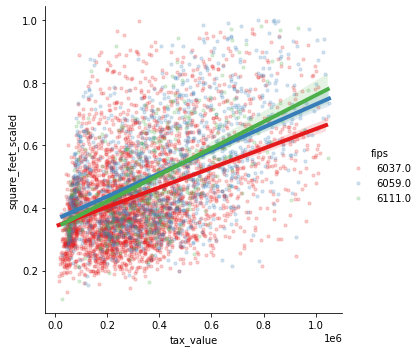

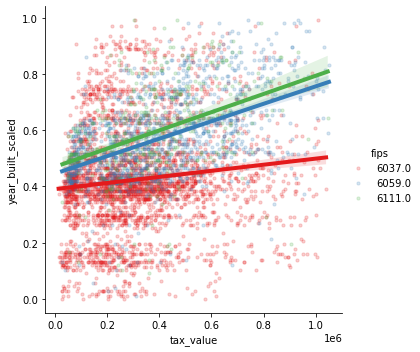

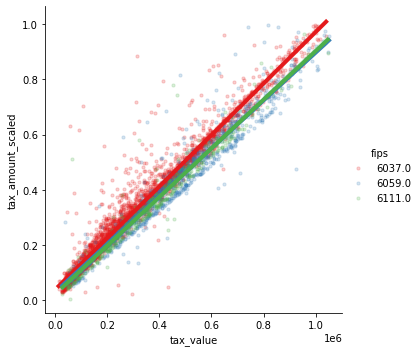

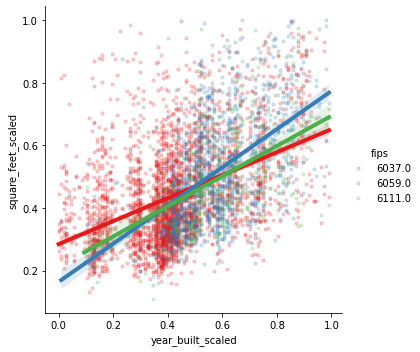

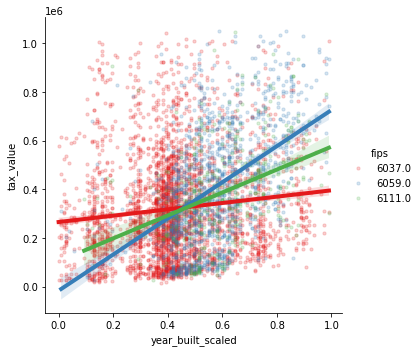

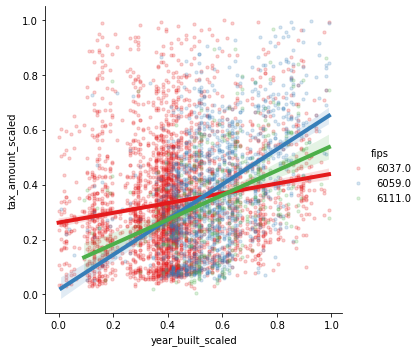

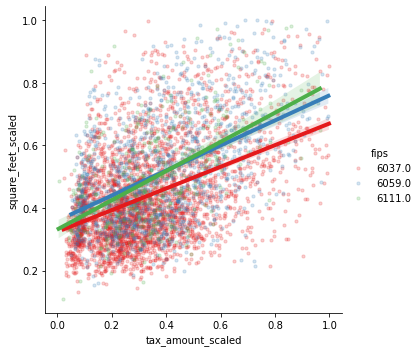

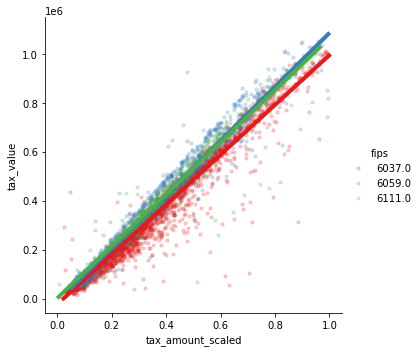

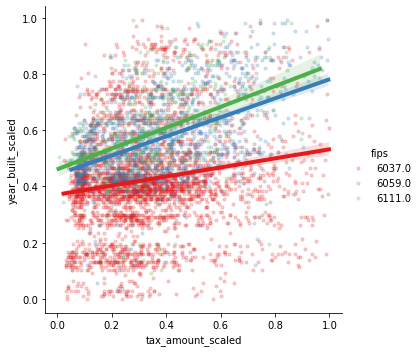

In [37]:
explore.plot_variable_pairs(train, numerics, categoricals[0:1], 5000)

## Just plotting tax value (variable of interest) vs other continuous

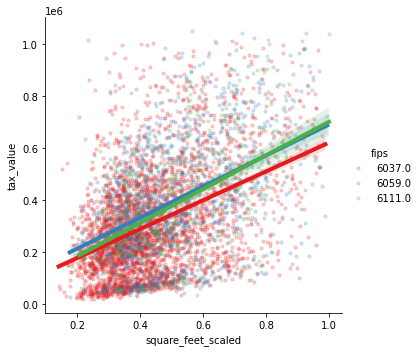

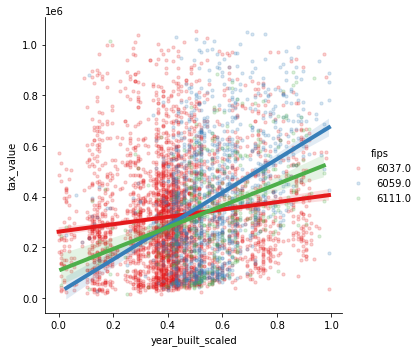

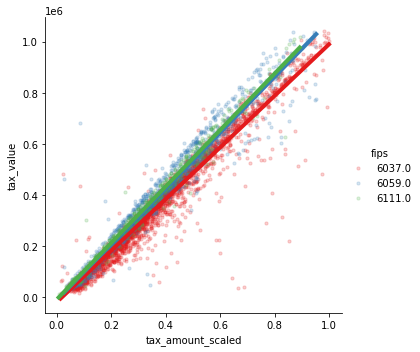

In [26]:
continuous_vs_tax_value = [
 'square_feet_scaled',
 'year_built_scaled',
 'tax_amount_scaled']
for continuous in continuous_vs_tax_value:
    sns.lmplot(data = train.sample(5000), x=continuous, 
               y='tax_value', 
               palette = 'Set1', hue = 'fips',
               scatter_kws={"alpha":0.2, 's':10}, line_kws={'lw':4})

## Plotting the categoricals (bedroom, bathrooms, fips) vs the continuous

Generating plots square_feet_scaled by bedroom_cnt


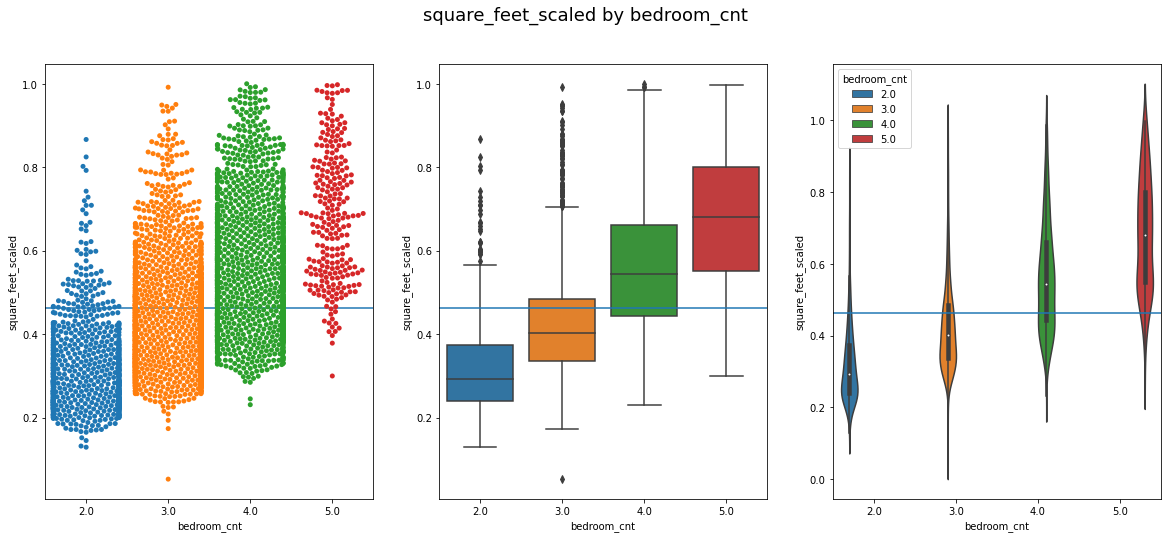

Generating plots square_feet_scaled by bathroom_cnt


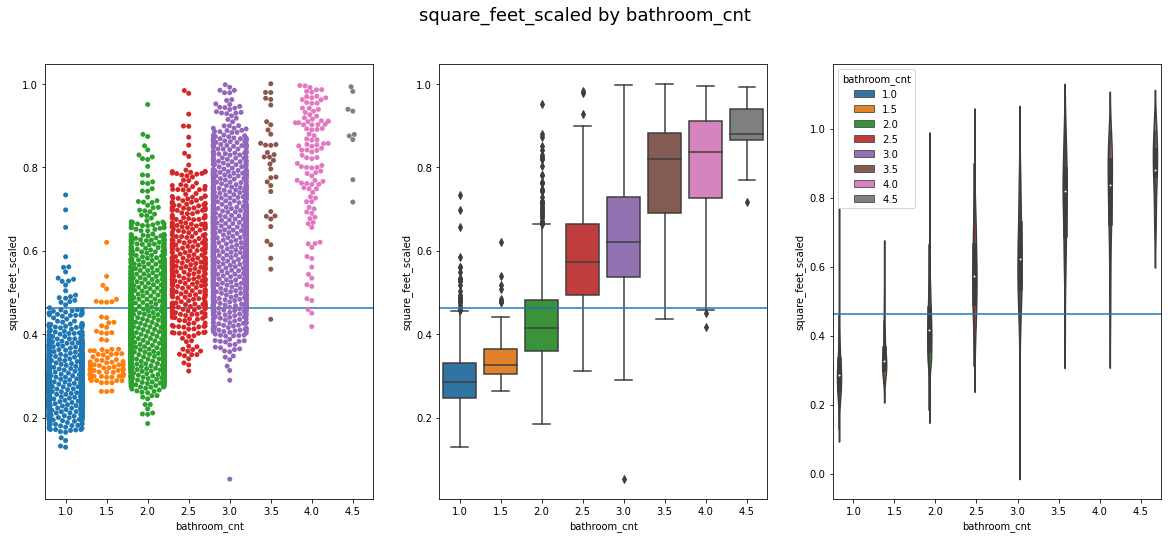

Generating plots square_feet_scaled by fips


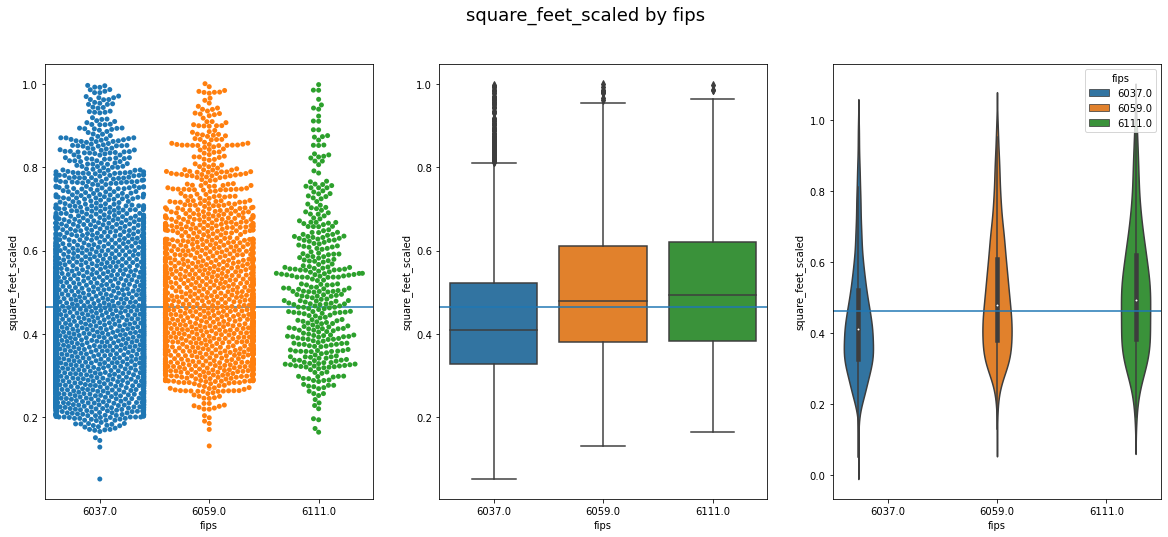

Generating plots tax_value by bedroom_cnt


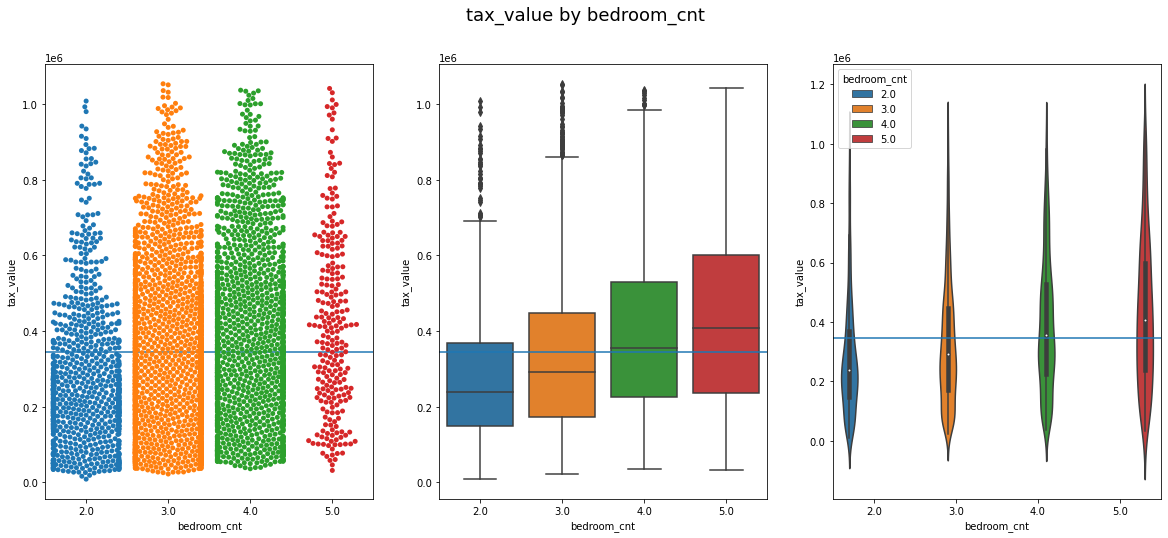

Generating plots tax_value by bathroom_cnt


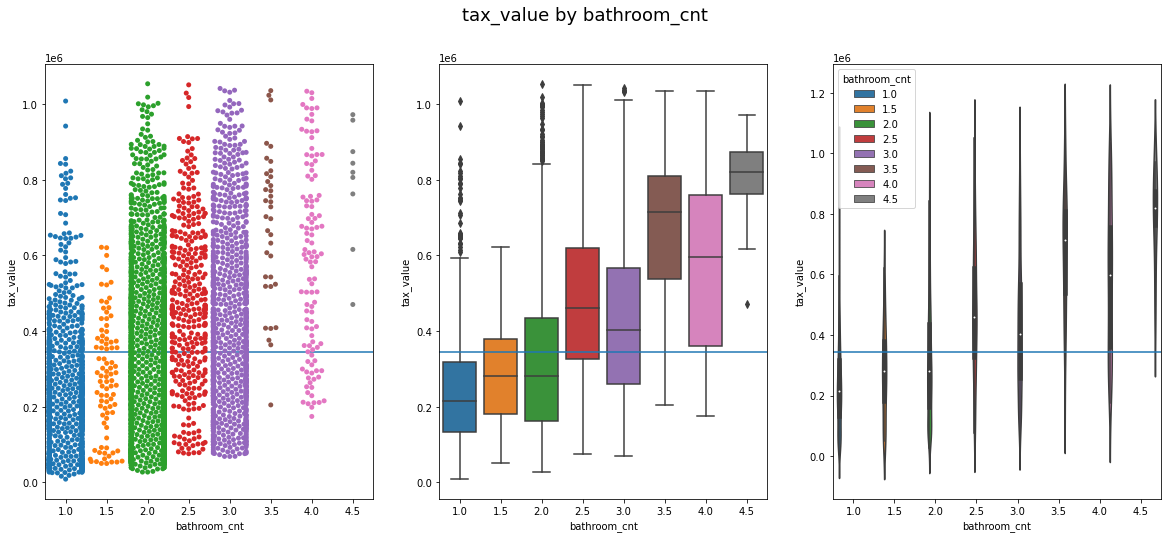

Generating plots tax_value by fips


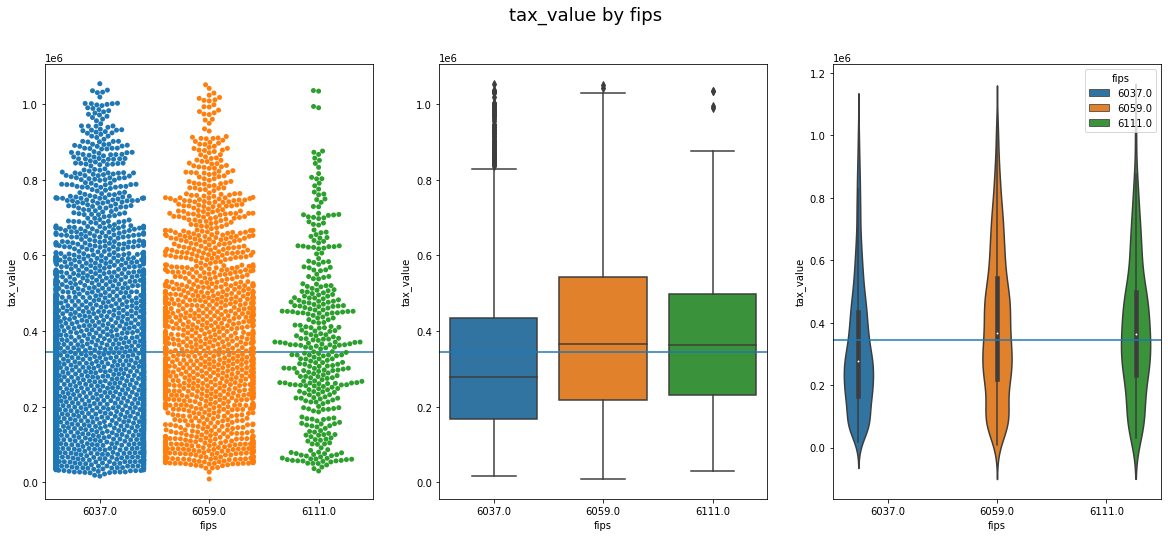

Generating plots year_built_scaled by bedroom_cnt


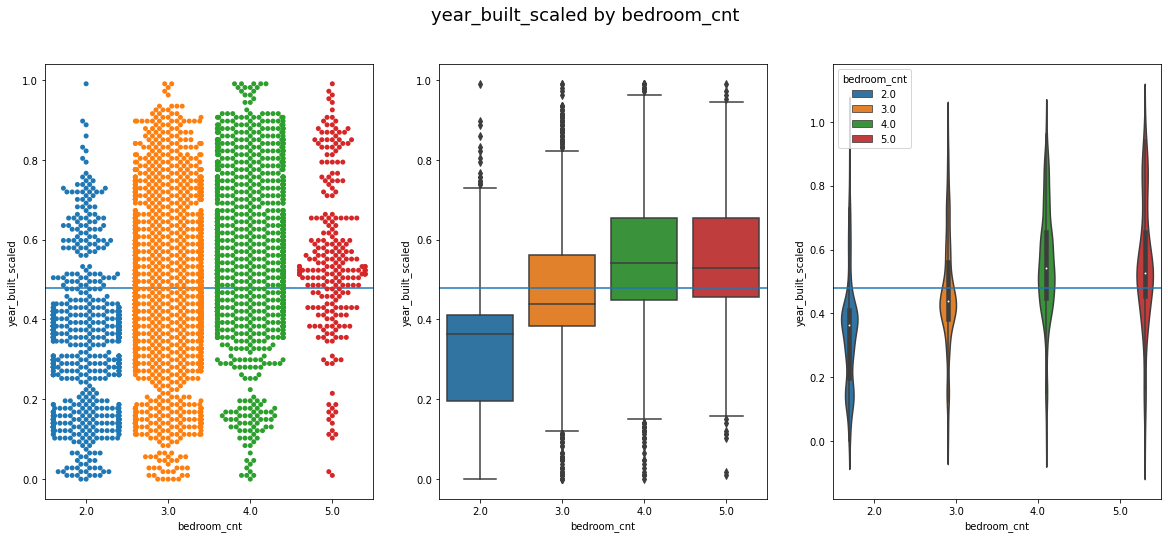

Generating plots year_built_scaled by bathroom_cnt


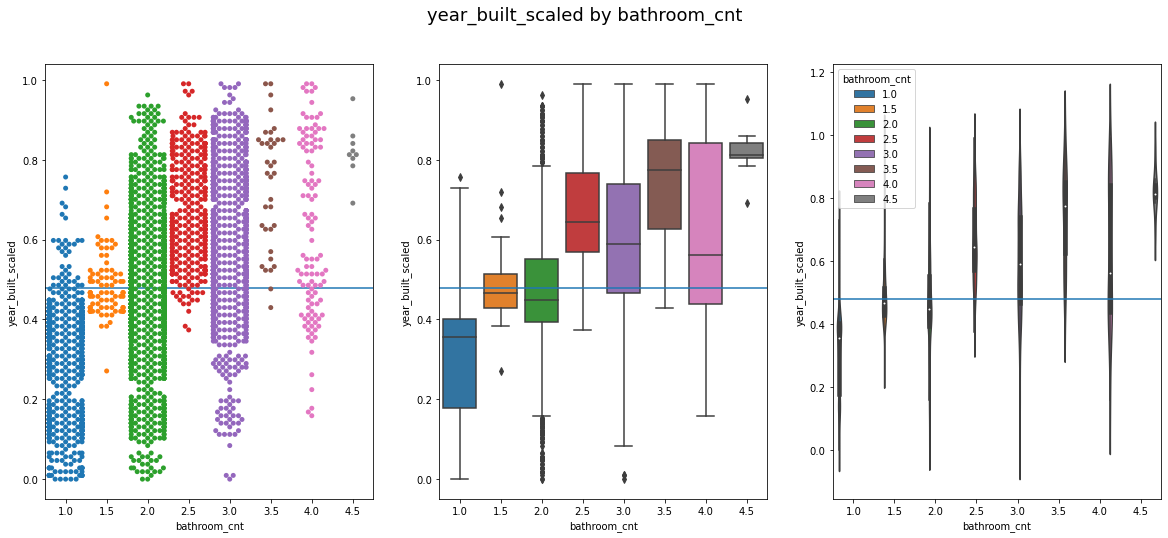

Generating plots year_built_scaled by fips


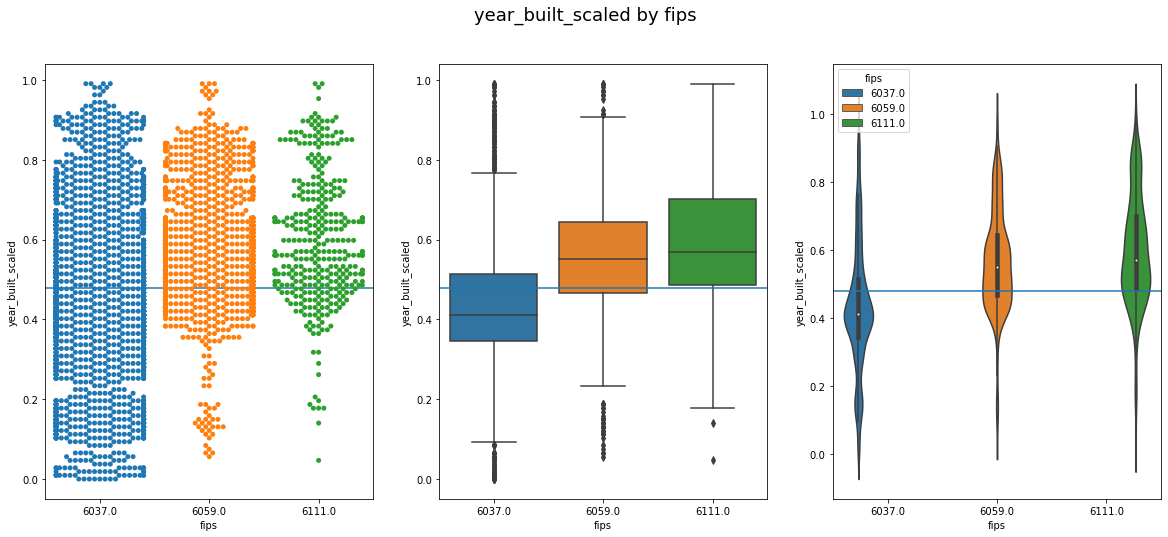

Generating plots tax_amount_scaled by bedroom_cnt


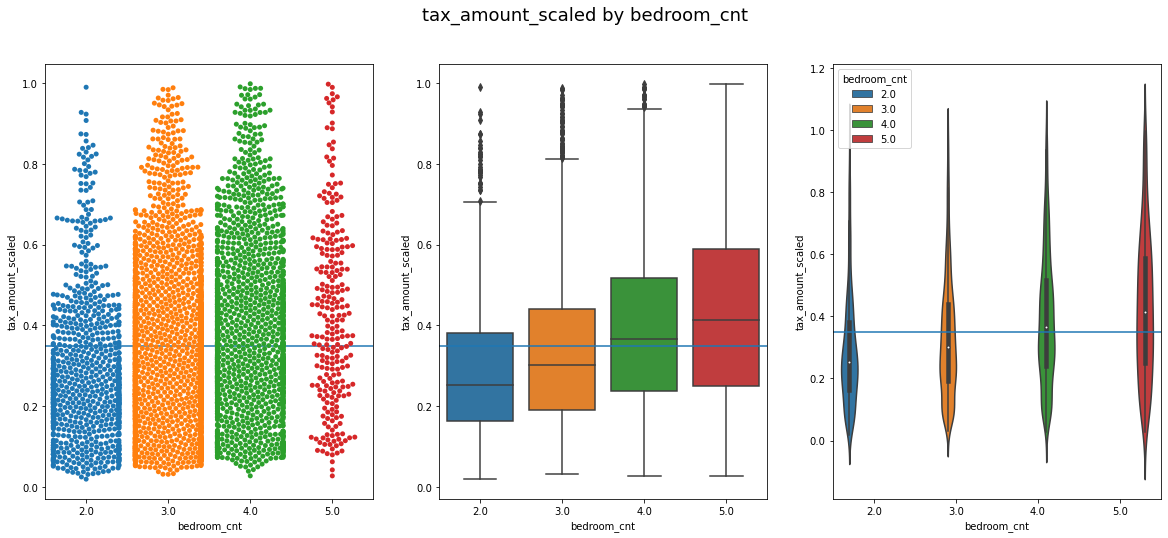

Generating plots tax_amount_scaled by bathroom_cnt


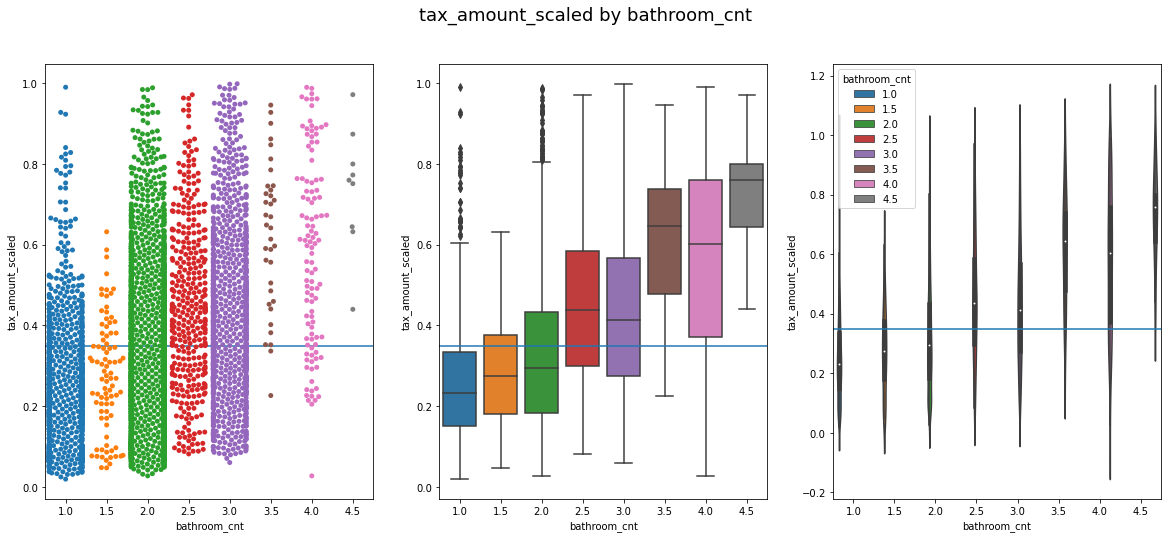

Generating plots tax_amount_scaled by fips


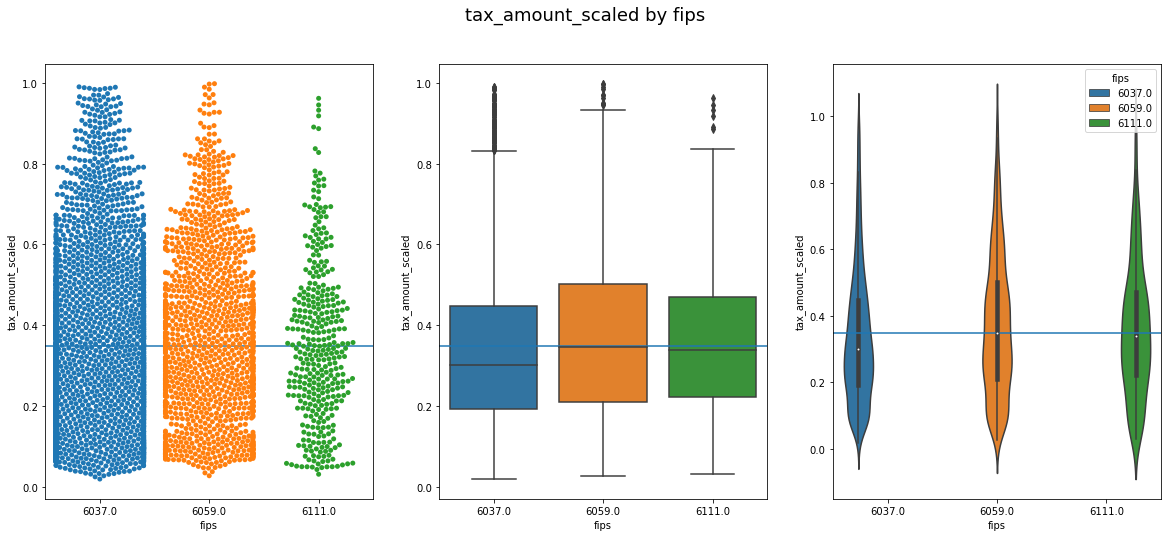

In [27]:
explore.plot_categorical_and_continuous_vars(train, ['bedroom_cnt','bathroom_cnt','fips'], numerics, 5000)

## Initial Hypothesis for predicting property value:
    - More bedrooms and more bathrooms are associated with higher value
    - Greater square feet is associated with higher value
    - The more modern the house the higher the value, though this looks to be a fairly weak correlation
    - By far the strongest looking linear correlation to tax value is the tax amount
    - Fips 6059 and 6111 seem to have higher mean tax value vs Fips 6037

## Statistical tests going forward:
- Correlation between tax value and other continuous (house age, tax amount, square footage)
    - Perhaps break this down by categoricals as well
